In [1]:
import pandas as pd
import json
import glob
import os
import csv
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import math
import itertools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
warnings.filterwarnings('ignore')

## Lendo, previamente, apenas uma sample de um usuário

In [2]:
path_arquivos = 'sensors/'
with open(path_arquivos+ '00qhiaz_1542975441749.json', 'r') as file:
    data = json.load(file)
    df = pd.json_normalize(data)
teste_u1 = df

In [3]:
teste_u1

,player_id,accelerometer,gyroscope,deviceMotion,magnetometer
0,00qhiaz,"[{'z': 0.5986328125, 'y': 0.822265625, 'x': 0....",[],[{'accelerationIncludingGravity': {'z': -5.451...,"[{'z': -41.75, 'y': -38.3125, 'x': -14.8125, '..."


In [4]:
dm = pd.DataFrame(teste_u1['deviceMotion'][0])
dm

,accelerationIncludingGravity,rotation,acceleration,orientation,screen
0,"{'z': -5.451907157897949, 'y': -8.084129333496...","{'gamma': -0.06065076217055321, 'alpha': -0.93...","{'z': 0.23969998955726624, 'y': 0.183200001716...",0,RegisterScreen
1,"{'z': -5.7231268882751465, 'y': -8.06232833862...","{'gamma': -0.05995381996035576, 'alpha': -0.78...","{'z': -0.021299999207258224, 'y': 0.1940999925...",0,RegisterScreen
2,"{'z': -5.954686641693115, 'y': -7.981843948364...","{'gamma': -0.055772945284843445, 'alpha': -0.8...","{'z': -0.23229999840259552, 'y': 0.25939998030...",0,RegisterScreen
3,"{'z': -5.545823097229004, 'y': -8.005481719970...","{'gamma': -0.058352842926979065, 'alpha': -0.7...","{'z': 0.21779999136924744, 'y': 0.212499991059...",0,RegisterScreen
4,"{'z': -5.759866237640381, 'y': -8.005304336547...","{'gamma': -0.06184571236371994, 'alpha': -0.71...","{'z': -0.009499999694526196, 'y': 0.2175999879...",0,RegisterScreen
...,...,...,...,...,...
186,"{'z': -6.468454837799072, 'y': -7.375435352325...","{'gamma': 0.030050672590732574, 'alpha': -0.90...","{'z': 0.20340000092983246, 'y': 0.209199994802...",0,RegisterScreen
187,"{'z': -6.573962688446045, 'y': -7.239020824432...","{'gamma': 0.03161315992474556, 'alpha': -0.921...","{'z': 0.08009999990463257, 'y': 0.279599994421...",0,RegisterScreen
188,"{'z': -6.46594762802124, 'y': -7.2755980491638...","{'gamma': 0.033663004636764526, 'alpha': -0.90...","{'z': 0.17430000007152557, 'y': 0.256300002336...",0,RegisterScreen
189,"{'z': -6.47304105758667, 'y': -7.2693047523498...","{'gamma': 0.04356536269187927, 'alpha': -1.150...","{'z': 0.19089999794960022, 'y': 0.239299997687...",0,RegisterScreen


In [5]:
teste = pd.DataFrame(teste_u1['accelerometer'][0])
teste[['x','y','z']]

,x,y,z
0,0.037109,0.822266,0.598633
1,0.039062,0.825195,0.576172
2,0.024414,0.826172,0.584961
3,0.030273,0.821289,0.592773
4,0.029297,0.816406,0.571289
...,...,...,...
189,-0.020508,0.760742,0.663086
190,-0.023438,0.752930,0.654297
191,-0.011719,0.742188,0.666992
192,-0.023438,0.749023,0.666016


O dataset possui: 
-ID
-accelerometer
-gyroscope
-magnetometer
-deviceMotion

In [6]:
df3_u1 = pd.DataFrame(teste_u1['deviceMotion'][0])
df3_u1.head()

,accelerationIncludingGravity,rotation,acceleration,orientation,screen
0,"{'z': -5.451907157897949, 'y': -8.084129333496...","{'gamma': -0.06065076217055321, 'alpha': -0.93...","{'z': 0.23969998955726624, 'y': 0.183200001716...",0,RegisterScreen
1,"{'z': -5.7231268882751465, 'y': -8.06232833862...","{'gamma': -0.05995381996035576, 'alpha': -0.78...","{'z': -0.021299999207258224, 'y': 0.1940999925...",0,RegisterScreen
2,"{'z': -5.954686641693115, 'y': -7.981843948364...","{'gamma': -0.055772945284843445, 'alpha': -0.8...","{'z': -0.23229999840259552, 'y': 0.25939998030...",0,RegisterScreen
3,"{'z': -5.545823097229004, 'y': -8.005481719970...","{'gamma': -0.058352842926979065, 'alpha': -0.7...","{'z': 0.21779999136924744, 'y': 0.212499991059...",0,RegisterScreen
4,"{'z': -5.759866237640381, 'y': -8.005304336547...","{'gamma': -0.06184571236371994, 'alpha': -0.71...","{'z': -0.009499999694526196, 'y': 0.2175999879...",0,RegisterScreen


In [7]:
df4_u1 = pd.DataFrame(teste_u1['magnetometer'][0])
df4_u1[['x','y','z']]

,x,y,z
0,-14.8125,-38.3125,-41.7500
1,-14.8750,-38.5625,-41.5625
2,-15.5625,-40.0000,-41.5000
3,-14.5000,-36.8750,-42.2500
4,-14.5000,-37.4375,-41.4375
...,...,...,...
190,-9.6875,-37.1250,-44.3750
191,-8.9375,-37.5000,-44.1250
192,-8.9375,-38.2500,-44.2500
193,-10.0000,-37.1875,-43.6250


## Analisando a quantidade de usuários e quantas vezes se repetem

In [8]:
lista = []
lista_arquivo = os.listdir('sensors/')
for file in lista_arquivo:
    lista.append(file.split("_")[0])
arquivos = pd.DataFrame(lista)

In [9]:
arquivos.value_counts()

9gykp6g    7904
flidyt     6595
uzip5ke    5229
frl4fzq    2870
d5deark    2218
           ... 
plfzjjx       1
d4ydsnq       1
d52s5qy       1
dici8pg       1
zyt437w       1
Length: 1132, dtype: int64

São 1132 usuários e tem alguns que não se repetem e outros que se repetem muito

In [10]:
h = pd.DataFrame(arquivos.value_counts())
h.columns = ['repeticao']

In [11]:
b = h
b = b.reset_index()
b.sort_index(inplace=True)
b_shuffled = b.sample(frac=1).reset_index(drop=True)

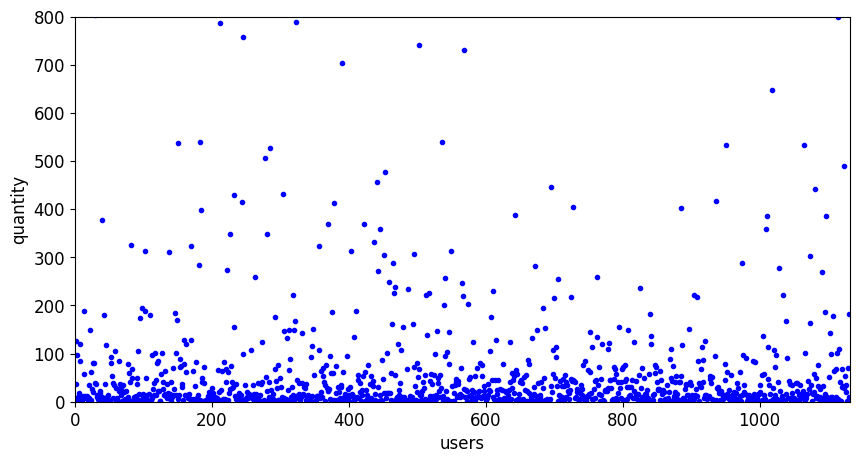

In [12]:
plt.figure(figsize=(10,5))
plt.plot(range(len(b_shuffled)),b_shuffled['repeticao'],'bo',ms=3)
plt.xlim(0, 1132)
plt.ylim(0, 800)
plt.xlabel("users",fontsize = 12)
plt.ylabel("quantity",fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Coletando o momento em que aparecem

### A motivação para isso seria confirmar se a disposição dos arquivos na database corresponde a ordem em que os jogadores jogaram ao longo do tempo. Sendo útil, pois nesta análise teremos interesse no primeiro jogo.

In [13]:
users_name_list = list(map(lambda x: x.split('_')[0], lista_arquivo))
timestamp_non_normalized = list(map(lambda x: int(x.split('_')[1].split(".")[0]), lista_arquivo))

In [15]:
tabela_aparicao = pd.DataFrame()
tabela_aparicao['file'] = lista_arquivo
tabela_aparicao['users'] = users_name_list
tabela_aparicao['timestamp_non_normalized'] = timestamp_non_normalized

In [16]:
# Os arquivos estão dispostos corretamente, porém o linux não percorre na ordem.
# Para que tudo ocorra bem, vamos corrigir
tabela_aparicao

,file,users,timestamp_non_normalized
0,b9dujd_1537050596696.json,b9dujd,1537050596696
1,alcfj3x_1543924241431.json,alcfj3x,1543924241431
2,tuvemg_1537224664404.json,tuvemg,1537224664404
3,wxo83eo_1536534656583.json,wxo83eo,1536534656583
4,k99bjw3_1537134720430.json,k99bjw3,1537134720430
...,...,...,...
101060,w764hxe_1543244016404.json,w764hxe,1543244016404
101061,h2o2ieg_1540718406383.json,h2o2ieg,1540718406383
101062,wxo83eo_1536530101774.json,wxo83eo,1536530101774
101063,otu8x88_1543661158020.json,otu8x88,1543661158020


In [17]:
tabela_aparicao_ordenada = pd.DataFrame()
for group_name, group_data in tabela_aparicao.groupby("users"):
    tabela_aparicao_ordenada = pd.concat([tabela_aparicao_ordenada, group_data.sort_values(by="timestamp_non_normalized")])
tabela_aparicao_ordenada.index = range(len(tabela_aparicao_ordenada))

In [18]:
tabela_aparicao = tabela_aparicao_ordenada.copy()

In [19]:
lista_groups = []
for group_name, group_data in tabela_aparicao.groupby("users"):
    for i in range(group_data.shape[0]):
        lista_groups.append(group_data.iloc[i,2] - group_data.iloc[0,2])

In [20]:
tabela_aparicao["timestamp"] = lista_groups

In [21]:
tabela_aparicao.head()

,file,users,timestamp_non_normalized,timestamp
0,00qhiaz_1542975441749.json,00qhiaz,1542975441749,0
1,00qhiaz_1542975530330.json,00qhiaz,1542975530330,88581
2,00qhiaz_1542975569307.json,00qhiaz,1542975569307,127558
3,00qhiaz_1542975613902.json,00qhiaz,1542975613902,172153
4,00qhiaz_1542975686475.json,00qhiaz,1542975686475,244726


In [22]:
# A tabela_arquivo agora contém a ordem correta para percorrer
tabela_arquivo = tabela_aparicao[['file','users']]

In [23]:
database = tabela_arquivo.drop_duplicates(subset=['users'],ignore_index=True)
database = database[['file']]

# Análise das quantidades das métricas dos usuários

### Essa análise visa resgatar a quantidade de usuários que tem determinada quantia das métricas que podemos estar interessados. Isso servirá principalmente para maximizar a quantidade de dados extraídos dado uma determinada quantidade de métricas

In [24]:
device_motion_abg = ['rotation','rotationRate']
device_motion_xyz = ['accelerationIncludingGravity','acceleration']

In [27]:
#leitura e tratamento das métricas dos usuários
def read_file(nome_arquivo, metricas):
    with open(path_arquivos + nome_arquivo, 'r') as file:
        data = json.load(file)
        dado_normalizado = pd.json_normalize(data)

    def get_metrica_data(metrica):
        df = dado_normalizado.copy()
        if metrica in device_motion_xyz:
            dm = pd.DataFrame(df['deviceMotion'][0])
            if dm.empty or metrica not in dm or dm[[metrica]].empty:
                return pd.DataFrame()
            dm_metrica = dm[[metrica]].dropna()
            dm_metrica[['x', 'y', 'z']] = dm_metrica[metrica].apply(pd.Series)
            dm_metrica =  dm_metrica.iloc[:,1:]
            return dm_metrica
        elif metrica in device_motion_abg:
            dm = pd.DataFrame(df['deviceMotion'][0])
            if dm.empty or metrica not in dm or dm[[metrica]].empty:
                return pd.DataFrame()
            dm_metrica = dm[[metrica]].dropna()
            dm_metrica[['alpha', 'beta', 'gamma']] = dm_metrica[metrica].apply(pd.Series)
            dm_metrica =  dm_metrica.iloc[:,1:]
            return dm_metrica
        else:
            df = pd.DataFrame(df[metrica][0])
            return df[['x','y','z']] if not df.empty else df
    result = [get_metrica_data(metrica) for metrica in metricas]
    return result if len(result) > 1 else result[0]

In [28]:
#criação de um plot da quantidades de métricas da primeira partida dos usuários
df_plot = pd.DataFrame(columns=['user','gyroscope','accelerometer',
                                'magnetometer','rotation','rotationRate',
                                'accelerationIncludingGravity','acceleration'])
i = 0
for user in database['file']:
    print(user,i)
    user_data = read_file(user,['gyroscope','accelerometer',
                                'magnetometer','rotation','rotationRate',
                                'accelerationIncludingGravity','acceleration'])
    row = []
    for data in user_data:
        data.dropna(inplace=True)
        row.append(data.shape[0])
    df_plot.loc[len(df_plot.index)] = [user.split('_')[0]] + row
    i = i + 1

00qhiaz_1542975441749.json 0
043lwou_1544003875815.json 1
054r5r7_1542975425968.json 2
06mdn3c_1536500534512.json 3
0c87n4d_1543254570710.json 4
0ddm38_1536621653869.json 5
0dhpckv_1538916098382.json 6
0e49nrq_1543223241209.json 7
0ew8zgp_1537220723280.json 8
0f4uezb_1541637607517.json 9
0ge7rd5_1536581882363.json 10
0hz8270_1537120509532.json 11
0irsvx7_1536510330054.json 12
0k2yiu3_1544011031687.json 13
0k77as7_1541859081685.json 14
0kjevf3_1544009719471.json 15
0ku7bb_1537211831125.json 16
0lnmasb_1542979201770.json 17
0mmpa11_1543257571611.json 18
0n1ewpo_1543531135711.json 19
0o2grk2_1536777846148.json 20
0pe7mrz_1543408207191.json 21
0sl48ao_1543861104586.json 22
0sqy7ba_1543246455697.json 23
0t7sulk_1543339068352.json 24
0u0m6ev_1543263369071.json 25
0xbcxal_1543256820883.json 26
0yjaom5_1543280942089.json 27
0yx7i56_1549297833161.json 28
0z75cgk_1536367880339.json 29
0z9xv36_1536303964945.json 30
0zb4hq6_1536751843700.json 31
0zh8j1j_1542969070547.json 32
11gi9t1_1542973881488.

In [29]:
df_plot.to_csv("quantidades_1_jogo.csv",index=False)
df_plot = pd.read_csv("quantidades_1_jogo.csv")
df_plot.head()

,user,gyroscope,accelerometer,magnetometer,rotation,rotationRate,accelerationIncludingGravity,acceleration
0,00qhiaz,0,194,195,191,0,191,191
1,043lwou,12,13,12,183,182,183,183
2,054r5r7,0,195,0,0,0,0,0
3,06mdn3c,198,198,195,191,191,191,191
4,0c87n4d,197,198,196,196,195,196,196


In [30]:
def plot_above_marks(df, columns):
    marks= list(range(-50, 650, 50))
    above_marks = []
    df_quantity = df.copy()
    df_result = pd.DataFrame()
    for mark in marks:
        result_list = []
        for column in columns:
            result_list.append(df_quantity[column] >= mark)
        result_bool = pd.Series(result_list[0])
        for series in result_list:
            result_bool = result_bool.mul(series)
        df_quantity[str(mark)] = result_bool
    
    df_quantity= df_quantity.iloc[:,(len(columns)+1):]
    df_quantity = df_quantity.astype(int).sum()
    x = []
    y = []
    for i in df_quantity.index:
        x.append(i)
    for b in df_quantity:
        y.append(b)
    plt.figure(figsize=(10,5))
    df = pd.DataFrame({'acima_de': x,
                   'quantidade': y})
    plt.plot(df['acima_de'], df['quantidade'], '-o')
    for x, y in zip(df['acima_de'], df['quantidade']):
        plt.annotate(y, (x, y), textcoords="offset points", xytext=(-15,-10), ha='center')
        
    for i, j in zip(df['acima_de'], df['quantidade']):
        plt.vlines(x=i, ymin=0, ymax=j, color='grey', linestyle=":")
        #plt.hlines(y=j, xmin=0, xmax=i, color='grey', linestyle=":")

    plt.xlabel(f"Valor de Referência('{columns}')")
    plt.ylabel('Quantidade de Usuários')
    plt.title(f"Quantidade de Usuários Acima de um Determinado Valor")
    plt.ylim(0,1132)
    plt.xlim(0)
    plt.show()

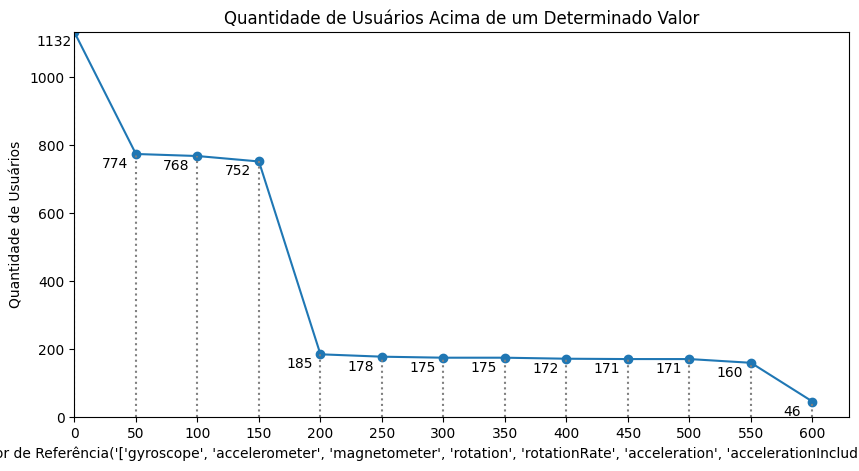

In [31]:
df = pd.read_csv("quantidades_1_jogo.csv")
columns = ["gyroscope", "accelerometer","magnetometer","rotation","rotationRate","acceleration","accelerationIncludingGravity"]
df = df[columns]
plot_above_marks(df, columns)

# Coletando os usuários pelas quantidades de suas métricas

### Agora que coletamos e vimos visualmente a quantidade de cada métrica de cada usuário no dataset, iremos coletar os usuários com base nessas quantidades.

In [32]:
def collect_metrics(quantity, metrics, user_count=100, nnid=False):
    """
    Função para coletar métricas de um ou mais arquivos de usuários.
    
    Parâmetros:
    quantity (int): Número de métricas a serem coletadas de cada arquivo de usuário.
    metrics (lista de strings): Lista com nome das métricas que serão coletadas.
    user_count (int, opcional): Número de usuários a serem considerados. Padrão é 100.
    non_id (bool, opcional): Se True, todas as métricas serão coletadas, independente de quantidade. Padrão é False.
    
    Retorno:
    DataFrame: DataFrame com as métricas coletadas e uma coluna "label" com o nome do usuário.
    """
    database = tabela_arquivo.drop_duplicates(subset=['users'], ignore_index=True)
    database = database['file']
    main_df = pd.DataFrame()
    def process_metric(metricas, metric_df):
        for i, user in enumerate(database):
            user_df = read_file(user, metricas)
            if type(user_df) is not list:
                user_df = [user_df]
            if all(len(df) >= quantity for df in user_df):
                combined_metrics = pd.concat([df.iloc[:quantity if not nnid else df.shape[0]]
                                             .assign(label=user.split('_')[0])
                                             for df in user_df], axis=1)
                labels = combined_metrics[['label']].iloc[:,0]
                combined_metrics.drop(columns=['label'],inplace=True)
                combined_metrics['label'] = labels
                metric_df = pd.concat([metric_df,combined_metrics])
                if len(metric_df['label'].value_counts())>=user_count:
                    break 
        metric_df.index = range(metric_df.shape[0])
        return metric_df        
    if len(metrics) == 1:
        return process_metric(metrics, main_df)
    else:
        return process_metric(metrics, main_df).dropna()

In [33]:
gy = collect_metrics(500,['gyroscope'])
ac = collect_metrics(500,['accelerometer'])
mg = collect_metrics(500,['magnetometer'])
all_id = collect_metrics(500,['gyroscope','accelerometer'])
all_non_id = collect_metrics(500,['gyroscope','accelerometer'],nnid=True)
all_metrics = collect_metrics(550,["gyroscope", "accelerometer","magnetometer","rotation","rotationRate","acceleration","accelerationIncludingGravity"])

In [35]:
#visualizando
all_metrics

,x,y,z,x,y,z,x,y,z,alpha,...,alpha,beta,gamma,x,y,z,x,y,z,label
0,0.009611,-0.009697,0.008563,-0.021912,-0.938538,-0.349960,0.000000,0.000000,0.000000,-0.062553,...,-0.001423,-0.005247,-0.000158,-0.006453,-0.017492,-0.000325,-3.433111,-9.207054,-0.214953,0f4uezb
1,0.008557,-0.012917,0.009605,-0.017319,-0.936646,-0.332840,0.000000,0.000000,0.000000,-0.062538,...,-0.003548,-0.005309,-0.000111,0.002931,-0.017361,0.001996,-3.423382,-9.207054,-0.212558,0f4uezb
2,0.008558,-0.013964,0.006379,-0.021194,-0.937576,-0.344818,0.000000,0.000000,0.000000,-0.062138,...,0.000732,-0.005309,-0.000089,-0.020847,-0.004602,-0.002491,-3.399581,-9.211993,-0.212708,0f4uezb
3,0.007500,-0.016105,0.006357,-0.022903,-0.935394,-0.342377,0.000000,0.000000,0.000000,-0.061517,...,0.000740,-0.002097,-0.000067,0.013265,0.009999,0.013707,-3.351531,-9.202563,-0.193548,0f4uezb
4,0.006434,-0.015042,0.007432,-0.019012,-0.936417,-0.332108,-7.116901,-24.508707,-19.855087,-0.061124,...,-0.001377,-0.002089,-0.001154,0.044163,0.016511,0.011920,-3.315605,-9.197923,-0.193697,0f4uezb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,-0.005300,0.008513,-0.000135,-0.012634,-0.973022,0.151459,-11.832048,-62.722454,-27.469467,-3.047097,...,0.011717,0.001070,0.003794,-0.033349,0.151360,0.001126,1.496288,-9.537567,-0.143851,mf1i1kh
54996,-0.014922,0.009644,0.004001,-0.011581,-0.969086,0.158768,-11.862637,-62.749176,-27.395128,-3.046350,...,0.002209,0.001034,-0.001638,0.002922,0.175595,-0.000481,1.542841,-9.511670,-0.147593,mf1i1kh
54997,-0.018022,0.027668,-0.000448,-0.010178,-0.970016,0.158600,-11.876307,-62.761665,-27.360579,-3.045501,...,0.007485,0.014918,0.005756,-0.001394,0.198986,0.000142,1.543739,-9.487421,-0.148791,mf1i1kh
54998,0.005327,0.021287,0.004139,-0.008453,-0.971237,0.140579,-11.861398,-62.722263,-27.457220,-3.047262,...,-0.001002,0.012764,0.001411,-0.144593,0.162937,0.084401,1.381926,-9.526489,-0.060025,mf1i1kh


In [38]:
all_metrics_nnid = collect_metrics(550,["gyroscope", "accelerometer","magnetometer","rotation","rotationRate","acceleration","accelerationIncludingGravity"],nnid=True)

In [39]:
all_metrics_nnid

,x,y,z,x,y,z,x,y,z,alpha,...,alpha,beta,gamma,x,y,z,x,y,z,label
0,0.009611,-0.009697,0.008563,-0.021912,-0.938538,-0.349960,0.000000,0.000000,0.000000,-0.062553,...,-0.001423,-0.005247,-0.000158,-0.006453,-0.017492,-0.000325,-3.433111,-9.207054,-0.214953,0f4uezb
1,0.008557,-0.012917,0.009605,-0.017319,-0.936646,-0.332840,0.000000,0.000000,0.000000,-0.062538,...,-0.003548,-0.005309,-0.000111,0.002931,-0.017361,0.001996,-3.423382,-9.207054,-0.212558,0f4uezb
2,0.008558,-0.013964,0.006379,-0.021194,-0.937576,-0.344818,0.000000,0.000000,0.000000,-0.062138,...,0.000732,-0.005309,-0.000089,-0.020847,-0.004602,-0.002491,-3.399581,-9.211993,-0.212708,0f4uezb
3,0.007500,-0.016105,0.006357,-0.022903,-0.935394,-0.342377,0.000000,0.000000,0.000000,-0.061517,...,0.000740,-0.002097,-0.000067,0.013265,0.009999,0.013707,-3.351531,-9.202563,-0.193548,0f4uezb
4,0.006434,-0.015042,0.007432,-0.019012,-0.936417,-0.332108,-7.116901,-24.508707,-19.855087,-0.061124,...,-0.001377,-0.002089,-0.001154,0.044163,0.016511,0.011920,-3.315605,-9.197923,-0.193697,0f4uezb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218456,-0.022275,0.001043,-0.006659,-0.017166,-0.972549,0.160339,-11.762315,-62.962807,-26.944530,-3.040418,...,-0.002039,-0.002145,-0.000679,0.013888,0.188899,-0.001784,1.632955,-9.485176,-0.166154,mf1i1kh
218457,-0.002094,0.027668,0.002933,-0.015610,-0.968964,0.163605,-11.759378,-62.954880,-26.964334,-3.041528,...,0.006437,0.000008,0.003661,-0.052210,0.193339,0.006630,1.562900,-9.481433,-0.155527,mf1i1kh
218458,0.009637,0.032943,0.001961,-0.012924,-0.969925,0.165070,-11.763057,-62.938244,-27.001535,-3.041734,...,-0.009434,-0.007511,-0.007107,-0.115606,0.158291,-0.003833,1.492546,-9.517659,-0.164957,mf1i1kh
218459,-0.006377,0.003202,-0.000102,-0.008255,-0.964920,0.145554,-11.753286,-62.980495,-26.907108,-3.043001,...,0.014897,-0.011700,0.003851,0.149422,0.188385,-0.017205,1.776356,-9.484428,-0.178130,mf1i1kh


In [110]:
#feito pra limitar a quantidade de dados
# non_id_limitado = pd.DataFrame()
# for key, data in all_non_id.groupby('label'):
#     if data.shape[0] >= 1000:
#         non_id_limitado = pd.concat([non_id_limitado,data.iloc[0:1000]])
#     else:
#         non_id_limitado = pd.concat([non_id_limitado,data])
# non_id_limitado.index = range(len(non_id_limitado))

# Formatação do dataframe

### A rede neural que iremos utilizar terá que particionar os dados e, esses dados deverão ser janelados

In [36]:
def normalizar_por_janela(dataframe, janela=200):
    """
    Função que formata um dataframe de entrada para que seus valores estejam normalizados.
    
    Parameters:
    dataframe (pandas.DataFrame): O dataframe a ser formatado.
    janela (int, opcional): O tamanho da janela de normalização dos valores. Padrão é 200.
    
    Returns:
    pandas.DataFrame: O dataframe formatado com valores normalizados.
    """
    dfd = 0
    repeticoes = (dataframe.shape[1]-1) // 3
    header = ['label'] + (repeticoes * ['X','Y','Z'])
    dfd = pd.DataFrame(columns=header)
    min_max_scaler = MinMaxScaler()
    for group_name, group_data in dataframe.groupby("label"):
        num_cols = group_data.shape[1] - 1
        i = 0
        j = janela
        while j < group_data.shape[0]:
            row_data = []
            row_data.append(group_name)
            for col in range(num_cols):
                col_data = group_data.iloc[i:j,col].values
                col_data = col_data.reshape(-1,1)
                col_data = min_max_scaler.fit_transform(col_data)
                col_data = [ "%.10f" % x for x in col_data.flatten().tolist()]
                col_data = ",".join(col_data)
                row_data.append(col_data)
            dfd.loc[len(dfd.index)] = row_data
            i += 1
            j += 1
    return dfd

In [418]:
all_id_formatado =  normalizar_por_janela(rotation)
#non_id_formatado = normalizar_por_janela(all_non_id)

In [125]:
#Forma para salvar
all_id_formatado.to_csv("all_id_formatado.csv",index=False,sep=';')
non_id_formatado.to_csv("non_id_formatado.csv",index=False,sep=';')

In [127]:
df = pd.read_csv("all_id_formatado.csv",sep=';')    

In [128]:
df

,label,XG,YG,ZG,XC,YC,ZC
0,0f4uezb,"0.1955508000,0.1931860229,0.1931878163,0.19081...","0.2565358077,0.2513813509,0.2497044150,0.24627...","0.1439959323,0.1459634413,0.1398770257,0.13983...","0.5417664460,0.5841667841,0.5483870968,0.53261...","0.4871337943,0.4959726281,0.4916244921,0.50181...","0.4031678544,0.4367626804,0.4132582789,0.41804..."
1,0f4uezb,"0.1931860229,0.1931878163,0.1908140727,0.18842...","0.2513813509,0.2497044150,0.2462763538,0.24797...","0.1459634413,0.1398770257,0.1398358265,0.14186...","0.5841667841,0.5483870968,0.5326102268,0.56853...","0.4959726281,0.4916244921,0.5018176634,0.49704...","0.4367626804,0.4132582789,0.4180489850,0.43819..."
2,0f4uezb,"0.1931878163,0.1908140727,0.1884206027,0.19556...","0.2497044150,0.2462763538,0.2479780195,0.25313...","0.1398770257,0.1398358265,0.1418636269,0.13991...","0.5483870968,0.5326102268,0.5685307790,0.51246...","0.4916244921,0.5018176634,0.4970418419,0.48827...","0.4132582789,0.4180489850,0.4381998922,0.40460..."
3,0f4uezb,"0.1908140727,0.1884206027,0.1955615598,0.19555...","0.2462763538,0.2479780195,0.2531324762,0.25484...","0.1398358265,0.1418636269,0.1399182248,0.13993...","0.5326102268,0.5685307790,0.5124665446,0.56613...","0.5018176634,0.4970418419,0.4882742890,0.49925...","0.4180489850,0.4381998922,0.4046050662,0.44394..."
4,0f4uezb,"0.1884206027,0.1955615598,0.1955543866,0.19315...","0.2479780195,0.2531324762,0.2548465069,0.25827...","0.1418636269,0.1399182248,0.1399332976,0.13995...","0.5685307790,0.5124665446,0.5661360755,0.54613...","0.4970418419,0.4882742890,0.4992515504,0.48592...","0.4381998922,0.4046050662,0.4439487394,0.41035..."
...,...,...,...,...,...,...,...
29995,l3fjh1p,"0.4861960545,0.4553668274,0.4781381668,0.53084...","0.7792445619,0.8119048333,0.7887899737,0.72579...","0.5649817338,0.5179921287,0.5561111252,0.53418...","0.8722164101,0.8620535047,0.8644447766,0.88200...","0.2162472857,0.3268616682,0.3483203474,0.26555...","0.4988893003,0.4970381340,0.4811181044,0.35468..."
29996,l3fjh1p,"0.4553668274,0.4781381668,0.5308487646,0.49992...","0.8119048333,0.7887899737,0.7257934953,0.67081...","0.5179921287,0.5561111252,0.5341822566,0.53727...","0.8620535047,0.8644447766,0.8820056793,0.86078...","0.3268616682,0.3483203474,0.2655511560,0.33529...","0.4970381340,0.4811181044,0.3546834506,0.60921..."
29997,l3fjh1p,"0.4781381668,0.5308487646,0.4999211761,0.42305...","0.7887899737,0.7257934953,0.6708161415,0.80766...","0.5561111252,0.5341822566,0.5372771938,0.51477...","0.8644447766,0.8820056793,0.8607831415,0.88394...","0.3483203474,0.2655511560,0.3352918636,0.29939...","0.4811181044,0.3546834506,0.6092188078,0.40559..."
29998,l3fjh1p,"0.5308487646,0.4999211761,0.4230540947,0.51607...","0.7257934953,0.6708161415,0.8076636916,0.77641...","0.5341822566,0.5372771938,0.5147740891,0.50745...","0.8820056793,0.8607831415,0.8839485877,0.86534...","0.2655511560,0.3352918636,0.2993996679,0.31689...","0.3546834506,0.6092188078,0.4055905220,0.52637..."


In [137]:
proporcoes_labels = non_id_formatado.groupby('label').size().div(len(non_id_formatado))
proporcoes_labels

label
0f4uezb    0.009997
0hz8270    0.009897
0n1ewpo    0.009947
0sl48ao    0.009922
0sqy7ba    0.009922
             ...   
k191nzh    0.008747
kwlh67i    0.010047
kwmdya1    0.009997
l1doqao    0.010022
l3fjh1p    0.009997
Length: 100, dtype: float64

# Particionamento

### O particionamento desses dados deve ser feito respeitando a mesma proporção do dataset original

In [142]:
def particiona_dados(dados_treino, particoes):
    n_dados = len(dados_treino)
    tamanho_particao = math.floor(n_dados / particoes)
    proporcoes_labels = dados_treino.groupby('label').size().div(len(dados_treino))
    
    lista_particoes = []
    dados_disponiveis = dados_treino.copy()
    
    for i in range(particoes):
        particao = pd.DataFrame(columns=dados_treino.columns)
        for label, proporcao in proporcoes_labels.items():
            qtde_dados = math.floor(tamanho_particao * proporcao)
            dados = dados_disponiveis[dados_disponiveis.label == label].iloc[:qtde_dados].copy()
            particao = pd.concat([particao, dados])
            dados_disponiveis.drop(dados.index, inplace=True)
        lista_particoes.append(particao)
        
    return lista_particoes,dados_disponiveis

def verifica_proporcoes(dados_treino, lista_particoes):
    proporcoes_labels = dados_treino.label.value_counts(normalize=True)
    n_dados = len(dados_treino)
    
    for particao in lista_particoes:
        proporcoes_particao = particao.label.value_counts(normalize=True)
        
        for label, proporcao_label in proporcoes_labels.items():
            proporcao_particao = proporcoes_particao.get(label, 0)
            
            if abs(proporcao_particao - proporcao_label) > 0.01:
                return False
    
    return True

### Teste se as proporções foram respeitadas, apesar do número de partições

In [153]:
dados_disponiveis = []
for i in range(2,120):
    lista_particoes, dados = particiona_dados(non_id_formatado,i)
    print(i,verifica_proporcoes(non_id_formatado,lista_particoes))
    dados_disponiveis.append(dados.shape[0])

2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True
19 True
20 True
21 True
22 True
23 True
24 True
25 True
26 True
27 True
28 True
29 True
30 True
31 True
32 True
33 True
34 True
35 True
36 True
37 True
38 True
39 True
40 True
41 True
42 True
43 True
44 True
45 True
46 True
47 True
48 True
49 True
50 True
51 True
52 True
53 True
54 True
55 True
56 True
57 True
58 True
59 True
60 True
61 True
62 True
63 True
64 True
65 True
66 True
67 True
68 True
69 True
70 True
71 True
72 True
73 True
74 True
75 True
76 True
77 True
78 True
79 True
80 True
81 True
82 True
83 True
84 True
85 True
86 True
87 True
88 True
89 True
90 True
91 True
92 True
93 True
94 True
95 True
96 True
97 True
98 True
99 True
100 True
101 True
102 True
103 True
104 True
105 True
106 True
107 True
108 True
109 True
110 True
111 True
112 True
113 True
114 True
115 True
116 True
117 True
118 True
119 True


### Como o particionamento tem que se prender nas proporções do dataset original, haverá perda de dados no momento de fazer essa equivalência. Dessa forma teremos que ver a quantidade de partições que forneça uma quantidade significativa dos dados.

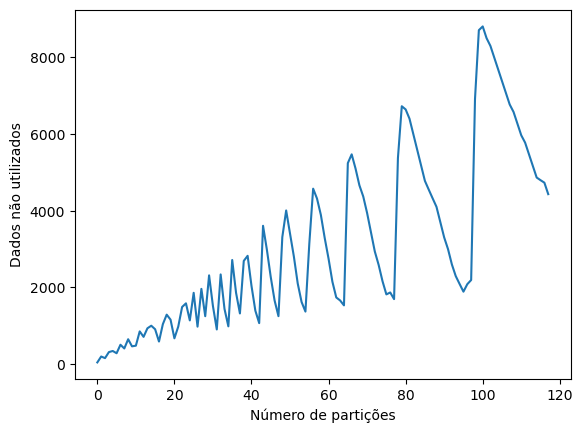

In [156]:
x = range(len(dados_disponiveis))
sns.lineplot(x=x, y=dados_disponiveis)
plt.xlabel("Número de partições")
plt.ylabel("Dados não utilizados")
plt.show()